# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [63]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()
data.tail()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0
128354,2018,2,NaN,WC,WINE CREDIT,REF,0.00,0.0,-81.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

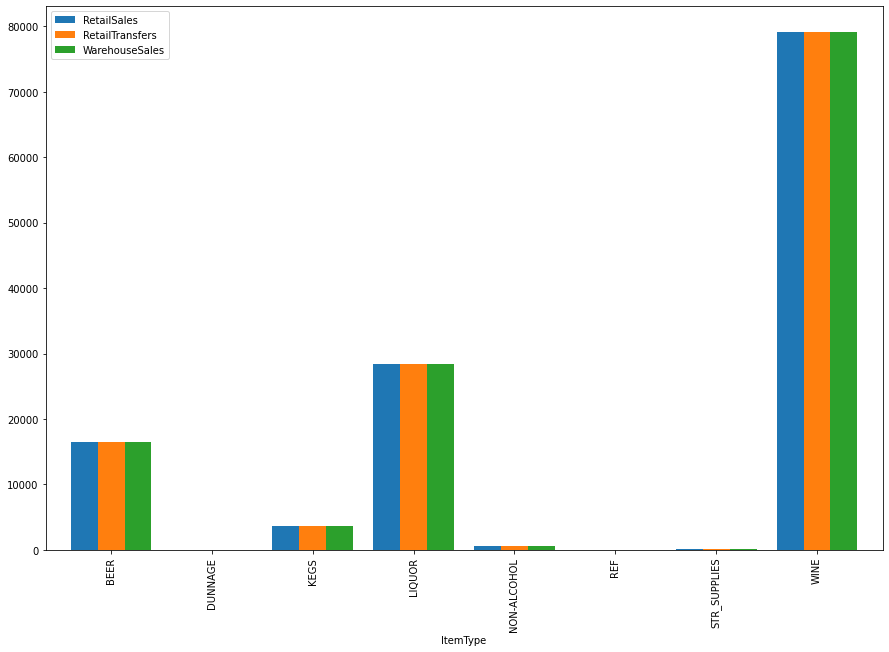

In [3]:
data.groupby("ItemType").agg({"RetailSales":"count", "RetailTransfers":"count", "WarehouseSales":"count"}).plot.bar(figsize=(15,10),width=0.8)

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

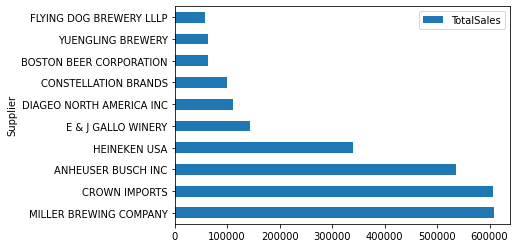

In [75]:
data["TotalSales"]=data['RetailSales']+data['WarehouseSales']
sales=data.groupby("Supplier").agg({"TotalSales":"sum"})
sales.sort_values(by=["TotalSales"],ascending=False).head(10).plot.barh()

In [76]:
new=data.groupby("Supplier").agg({"RetailSales":"sum","WarehouseSales":"sum"})
new["TotalSales"]=new['RetailSales']+new['WarehouseSales']
new.tail()
#te lo dejo, aunque está hecho arriba pero esto es haciéndo el ppio a la inversa

,RetailSales,WarehouseSales,TotalSales
Supplier,,,
WINEBOW INC,1.24,0.00,1.24
YOUNG WON TRADING INC,1058.65,2528.90,3587.55
YUENGLING BREWERY,9628.35,53805.32,63433.67
Z WINE GALLERY IMPORTS LLC,8.83,16.00,24.83
ZURENA LLC,16.15,0.00,16.15


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

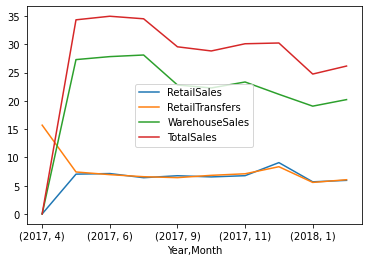

In [84]:
data.groupby(["Year","Month"]).mean().plot()
#agg({"RetailSales":"avg","WarehouseSales":"avg","RetailTransfers":"avg"})

## 4. Plot the same information as above but as a bar chart.

<Figure size 5760x1440 with 0 Axes>

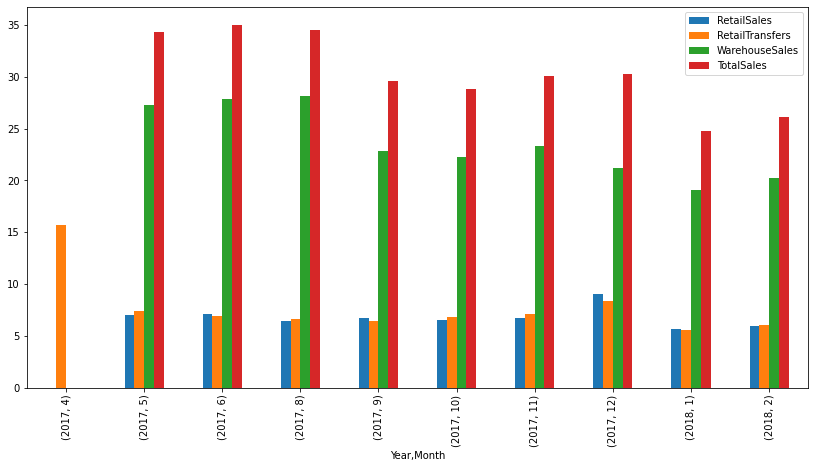

In [154]:
plt.figure(figsize=(80,20))
data.groupby(["Year","Month"]).mean().plot.bar(figsize=(14,7))


## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

RetailSales  RetailTransfers  WarehouseSales  \
Year Month ItemType                                                     
2017 4     BEER                 0.00         20045.00            0.00   
           LIQUOR               0.00         29568.82            0.00   
           NON-ALCOHOL          0.00          1031.00            0.00   
           REF                  0.00            13.00            0.00   
           STR_SUPPLIES         0.00           293.00            0.00   
...                              ...              ...             ...   
2018 2     LIQUOR           28852.31         29295.05         3311.85   
           NON-ALCOHOL        812.84           893.66          914.50   
           REF                 41.52            20.00         -116.00   
           STR_SUPPLIES        47.76           409.00            0.00   
           WINE             29409.39         30973.35        44331.49   

                         TotalSales  
Year Month ItemType                  
2017 4     BEER                0.00  
           LIQUOR              0.00  
           NON-ALCOHOL         0.00  
           REF                 0.00  
           STR_SUPPLIES        0.00  
...                             ...  
2018 2     LIQUOR          32164.16  
           NON-ALCOHOL      1727.34  
           REF               -74.48  
           STR_SUPPLIES       47.76  
           WINE            73740.88  

[73 rows x 4 columns]

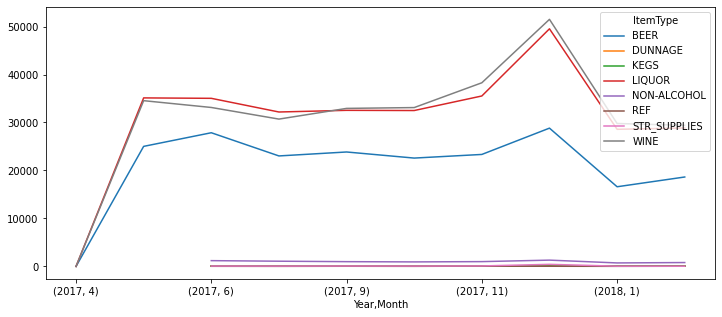

In [184]:
#turbio turbio no?
items=data.groupby(["Year","Month","ItemType"]).sum().sort_index()
suma=items["RetailSales"]
x=data.ItemType.unique()
suma.unstack().plot(figsize=(12,5))
items

## 6. Plot the same information as above but as a bar chart.

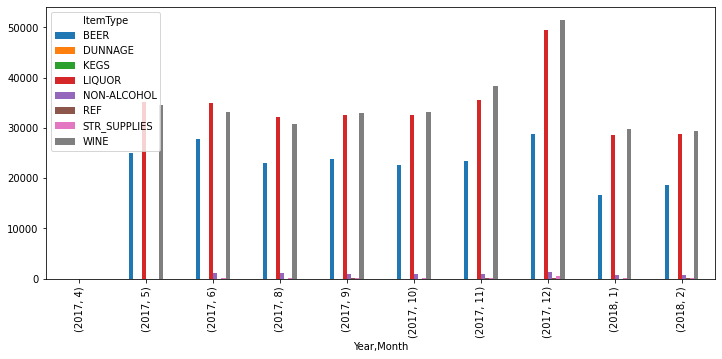

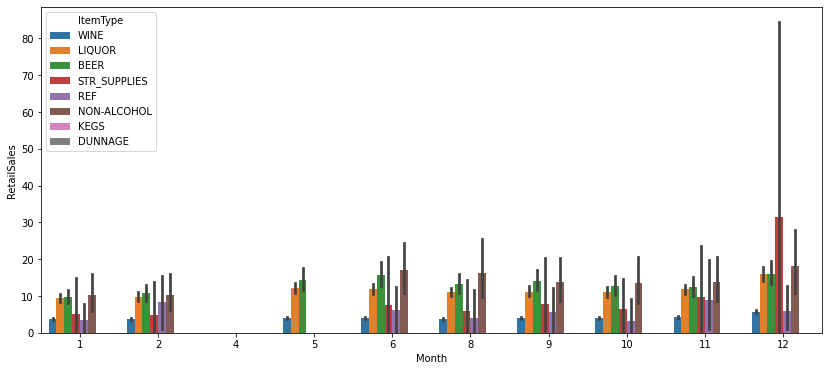

In [185]:
suma.unstack().plot.bar(figsize=(12,5))
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x="Month",y="RetailSales",hue="ItemType", data=data)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

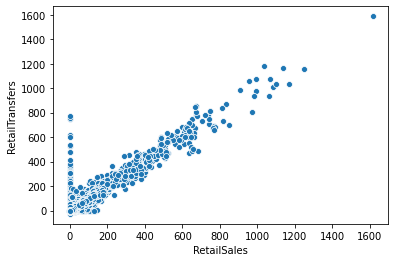

In [160]:
import seaborn as sns
sns.scatterplot(x="RetailSales",y="RetailTransfers", data=data)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

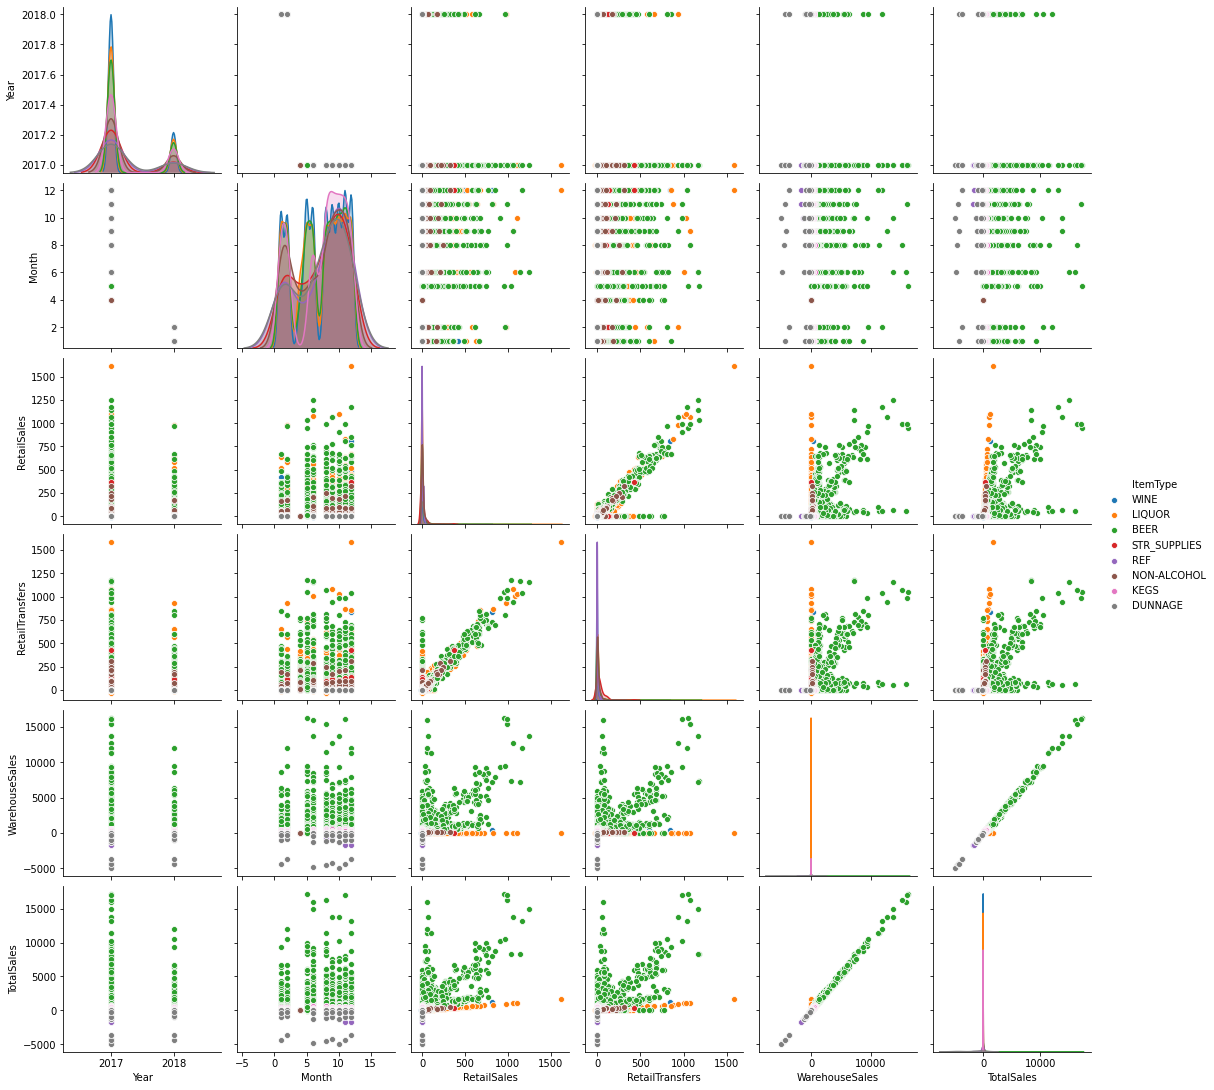

In [162]:
sns.pairplot(data, hue="ItemType")